<a href="https://colab.research.google.com/github/hadefpetriza/C23-PC679/blob/main/C23_PC679_Machine_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification
**Note :**
Jadi Aplikasi dapat mendeteksi kelima item berikut
1.   Sampah Organic
2.   Plastik (Recycle)
3.   Kayu (Recycle) --> data kayu dikit banget
4.   Seng / besi (Recycle)
5.   Non-Recycle(Sampah medis, sampah basah, sampah kaca) --> Baru ada gambar berupa obat pil dan botol kaca




In [ ]:
# Library yang digunakan
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import random
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from keras.models.cloning import Sequential
from PIL import Image

In [ ]:
# File path for data
train_dataset = "DATASET/TRAIN"
val_dataset = "DATASET/TEST"

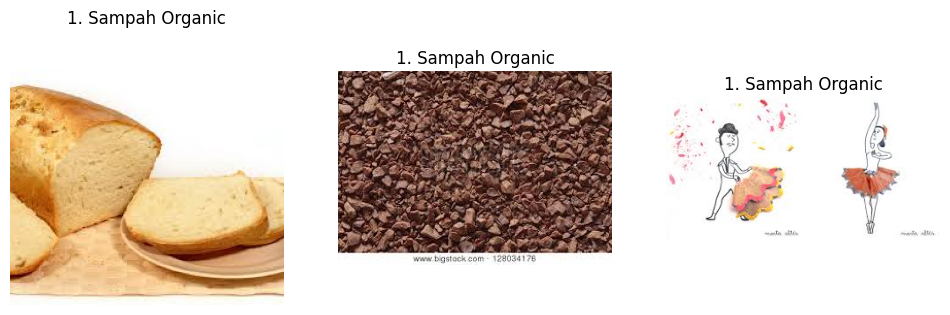

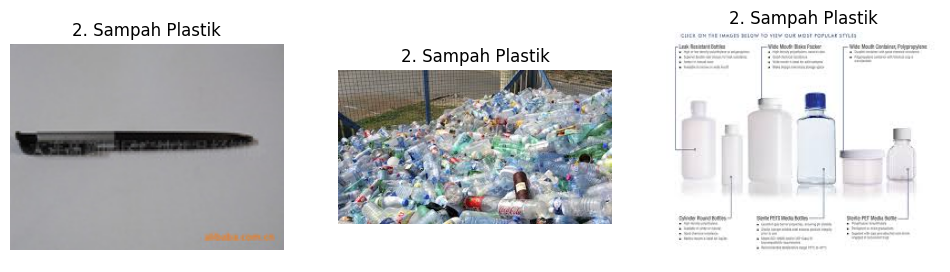

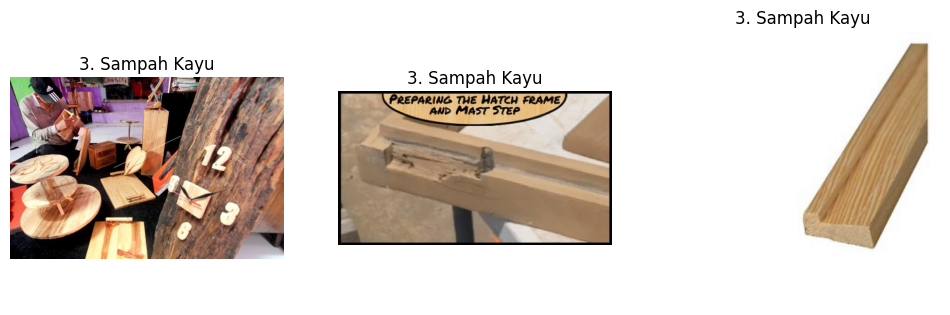

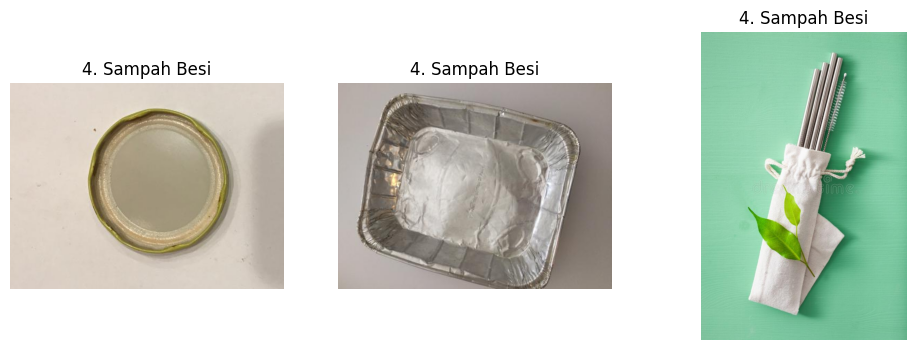

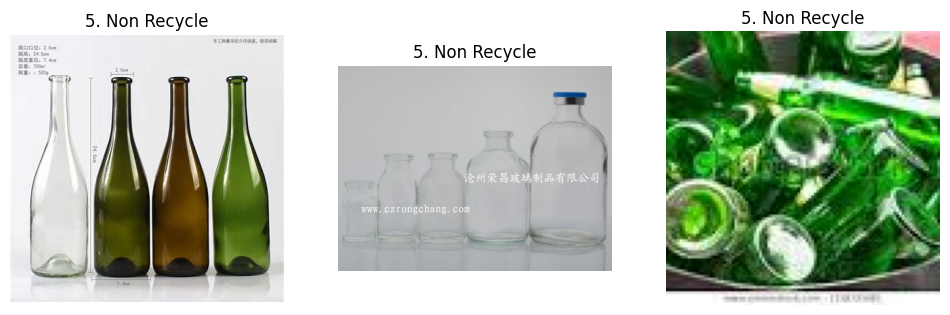

In [ ]:
# Show the 3 file for each class in train dataset
def show_images_from_folder(folder_path):
    class_folders = sorted(os.listdir(folder_path))  # Mengurutkan daftar folder kelas
    for class_folder in class_folders:
        class_path = os.path.join(folder_path, class_folder)
        if os.path.isdir(class_path):
            image_files = os.listdir(class_path)
            random.shuffle(image_files)
            sample_files = image_files[:3]  # Ambil 3 gambar acak dari setiap folder
            plt.figure(figsize=(12, 4))
            for idx, file_name in enumerate(sample_files):
                file_path = os.path.join(class_path, file_name)
                img = Image.open(file_path)
                plt.subplot(1, 3, idx+1)
                plt.imshow(img)
                plt.title(class_folder)
                plt.axis('off')
            plt.show()

# Menunjukkan 3 gambar dari setiap folder dalam direktori train_dataset
show_images_from_folder(train_dataset)

In [ ]:
# Load the MobileNetV2 model
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze the layers in the base model
base_model.trainable = False

In [ ]:
# Image Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                     rotation_range = 40,
                                     width_shift_range = 0.2,
                                     height_shift_range = 0.2,
                                     shear_range = 0.2,
                                     zoom_range = 0.2,
                                     horizontal_flip = True,
                                     fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(directory = train_dataset,
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    target_size = (224, 224))

val_datagen = ImageDataGenerator(rescale = 1./255.)
val_generator = val_datagen.flow_from_directory(directory = val_dataset,
                                                batch_size = 32,
                                                class_mode = 'categorical',
                                                target_size = (224, 224))



Found 20906 images belonging to 5 classes.
Found 2789 images belonging to 5 classes.


In [ ]:
# Model Architecture
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax')
])


model.compile(optimizer = tf.optimizers.Adam(),
                loss = "categorical_crossentropy",
                metrics = ["accuracy"])




In [ ]:
# Train Model
history = model.fit(train_generator,
                    epochs = 30,
                    validation_data = val_generator)

Epoch 1/30
654/654 [==============================] - 796s 1s/step - loss: 0.4391 - accuracy: 0.8461 - val_loss: 0.6083 - val_accuracy: 0.7881
Epoch 2/30
654/654 [==============================] - 680s 1s/step - loss: 0.3363 - accuracy: 0.8797 - val_loss: 0.4016 - val_accuracy: 0.8573
Epoch 3/30
654/654 [==============================] - 536s 819ms/step - loss: 0.3033 - accuracy: 0.8923 - val_loss: 0.4271 - val_accuracy: 0.8508
Epoch 4/30
654/654 [==============================] - 515s 788ms/step - loss: 0.2845 - accuracy: 0.8964 - val_loss: 0.4143 - val_accuracy: 0.8569
Epoch 5/30
654/654 [==============================] - 509s 778ms/step - loss: 0.2675 - accuracy: 0.9027 - val_loss: 0.4202 - val_accuracy: 0.8498
Epoch 6/30
654/654 [==============================] - 508s 777ms/step - loss: 0.2531 - accuracy: 0.9086 - val_loss: 0.4298 - val_accuracy: 0.8519
Epoch 7/30
654/654 [==============================] - 507s 775ms/step - loss: 0.2370 - accuracy: 0.9142 - val_loss: 0.4435 - val_a

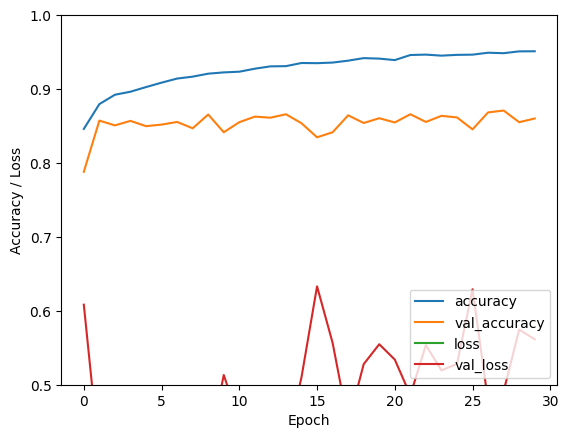

In [ ]:
# Plot training accuracy and validation accuracy
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")

# Plot training loss and validation loss
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")

plt.xlabel("Epoch")
plt.ylabel("Accuracy / Loss")
plt.ylim([0.5, 1])  # Adjust the y-axis limits as needed
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Save model
model.save("model.h5")